In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

from alldata import AllData
from ensemble import EnsembleMember,FullEnsemble

np.set_printoptions(precision=2)
%matplotlib notebook
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

In [2]:
ad = AllData()
ad.year0 = 1951
ad.usefanom = True
ad.gather(update=False)

fe = FullEnsemble(ad)
fe.cal = 'S'
fe.nonlin = 'cutoff'
fe.lump = True
fe.gather(force_update=False)

Gathered all data
Reading old saved ensemble  ../data/ensemble_calS_fanom_cutoff_1951_lump.nc


In [3]:
plt.style.use('../src/style_paper')
mpl.rc('figure.subplot',left=.2,bottom=.2)

2.574733874858346 0.8464091754960376 7.877514984319364 3.663430996572289
1.7070000000000016 0.7156000000000006 5.014800000000002 2.4828703529122187
2.574137023663969


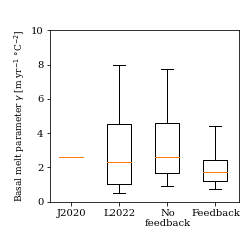

In [4]:
fig,ax = plt.subplots(1,1,sharex=True,sharey='row',figsize=(3.5,3.5))

gamma0 = np.array(fe.gamma[0,:,:]).flatten()
gamma1 = np.array(fe.gamma[1,:,:]).flatten()

#print(len(gamma0))

#gamma0 = np.where(gamma0<0,np.nan,gamma0)
#gamma0 = np.where(np.isnan(gamma1),np.nan,gamma0)
#gamma1 = np.where(np.isnan(gamma0),np.nan,gamma1)

gamma0 = gamma0[~np.isnan(gamma0)]
gamma1 = gamma1[~np.isnan(gamma1)]
#print(len(gamma0),len(gamma1))

print(np.nanmedian(gamma0),np.nanpercentile(gamma0,5),np.nanpercentile(gamma0,95),np.nanmean(gamma0))
print(np.nanmedian(gamma1),np.nanpercentile(gamma1,5),np.nanpercentile(gamma1,95),np.nanmean(gamma1))


gammaE = np.array([.5,.5,1,1,1,2.3,2.3,2.3,2.3,2.3,4.5,4.5,4.5,8,8])

#print(np.nanmedian(gammaE),np.nanpercentile(gammaE,5),np.nanpercentile(gammaE,95))


ax.boxplot([gammaE,gamma0,gamma1],showfliers=False,widths=.5,notch=False,whis=(5,95))#,labels=['L2022','Before recal.','After recal.'])

#for gammaJ in [7710,15300]:
#    ax.plot([-1.125,-1+.125],np.array([gammaJ,gammaJ])*(1028*3974/(918*3.34e5))**2,c='k')
    #print(gammaJ*(1028*3974/(918*3.34e5))**2)
#ax.plot([-1,-1],np.array([7710,15300])*(1028*3974/(918*3.34e5))**2,c='k')
    
#ax.plot([-1.25,-1+.25],np.array([11100,11100])*(1028*3974/(918*3.34e5))**2,c='tab:orange')

#for gammaJ in [9620,21000]:
#    ax.plot([-.125,.125],np.array([gammaJ,gammaJ])*(1028*3974/(918*3.34e5))**2,c='k')
#    print(gammaJ*(1028*3974/(918*3.34e5))**2)
#ax.plot([0,0],np.array([9620,21000])*(1028*3974/(918*3.34e5))**2,c='k')

    
ax.plot([-.25,.25],np.array([14500,14500])*(1028*3974/(918*3.34e5))**2,c='tab:orange')
print(14500*(1028*3974/(918*3.34e5))**2)
    
#ax.violinplot([gammaE,gamma0,gamma1],showextrema=False,showmedians=True,quantiles=[[.17,.83],[.17,.83],[.17,.83]])#,showfliers=False,widths=.5,notch=False,labels=['L2022','Before recal.','After recal.'])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['J2020','L2022','No\nfeedback','Feedback'])


ax.set_ylim([0,10])

ax.set_ylabel(r'Basal melt parameter $\gamma$ [m yr$^{-1}$ $\degree$C$^{-2}$]')

plt.savefig(f'../draftfigs/gamma_distribution.png',dpi=450,facecolor='w',transparent=False)
plt.show()
